# Data Cleaning 3: Outliers

### 1. Consider the two variables: *TOTAL_REVENUE* and *TOTAL_EXPENDITURE*. Do these variables have outlier values?

In [68]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

In [69]:
# Establish postgres access details
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

# Start the engine and connect to the database
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

# Perform a select query
education_df = pd.read_sql_query('SELECT * FROM useducation', con=engine)

# Dispose the engine. We don't need it anymore
engine.dispose()

In [70]:
# We will use the interpolation technique because it gave us more usable looking data. With the other techniques, pretty much everything but the median would be outliers
education_df = education_df.interpolate(method='linear')

# Then we fill the rest with medians
for year in education_df['YEAR'].unique():
    education_df = education_df.fillna(education_df.loc[education_df['YEAR'] == year].median())

print(education_df.isnull().sum())
education_df

PRIMARY_KEY                     0
STATE                           0
YEAR                            0
ENROLL                          0
TOTAL_REVENUE                   0
FEDERAL_REVENUE                 0
STATE_REVENUE                   0
LOCAL_REVENUE                   0
TOTAL_EXPENDITURE               0
INSTRUCTION_EXPENDITURE         0
SUPPORT_SERVICES_EXPENDITURE    0
OTHER_EXPENDITURE               0
CAPITAL_OUTLAY_EXPENDITURE      0
GRADES_PK_G                     0
GRADES_KG_G                     0
GRADES_4_G                      0
GRADES_8_G                      0
GRADES_12_G                     0
GRADES_1_8_G                    0
GRADES_9_12_G                   0
GRADES_ALL_G                    0
AVG_MATH_4_SCORE                0
AVG_MATH_8_SCORE                0
AVG_READING_4_SCORE             0
AVG_READING_8_SCORE             0
dtype: int64


,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,5.084018e+05,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,261.925519
1,1992_ALASKA,ALASKA,1992,5.084018e+05,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,211.790904,258.776900,207.088116,258.859712
2,1992_ARIZONA,ARIZONA,1992,5.084018e+05,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,5.084018e+05,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,5.084018e+05,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,265.519676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487,2017_VIRGINIA,VIRGINIA,2017,1.595024e+06,23766529.0,1680983.0,9277802.0,12807744.0,23352516.0,12247509.0,...,1212.0,1103.0,1024.0,9403.0,5084.0,446508.0,248.041059,290.081407,227.598382,273.402640
1488,2017_WASHINGTON,WASHINGTON,2017,1.595024e+06,23766529.0,1680983.0,9277802.0,12807744.0,23352516.0,12247509.0,...,1212.0,1103.0,1024.0,9403.0,5084.0,446508.0,241.701001,289.131257,223.123409,267.744778
1489,2017_WEST_VIRGINIA,WEST_VIRGINIA,2017,1.595024e+06,23766529.0,1680983.0,9277802.0,12807744.0,23352516.0,12247509.0,...,1212.0,1103.0,1024.0,9403.0,5084.0,446508.0,236.057019,273.415854,217.316396,271.617023
1490,2017_WISCONSIN,WISCONSIN,2017,1.595024e+06,23766529.0,1680983.0,9277802.0,12807744.0,23352516.0,12247509.0,...,1212.0,1103.0,1024.0,9403.0,5084.0,446508.0,240.389213,288.143144,219.612694,258.700304


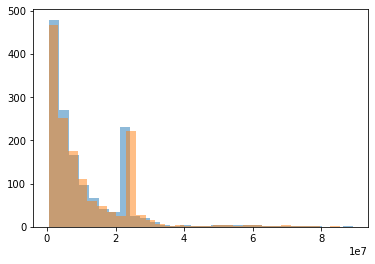

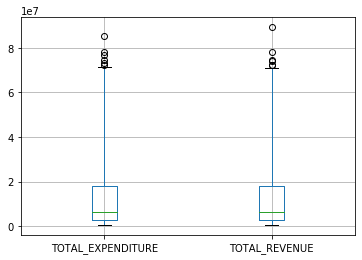

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.boxplot(x='YEAR', y='TOTAL_REVENUE', data=education_df)
plt.hist(education_df['TOTAL_REVENUE'], bins=30, alpha=.5)
plt.hist(education_df['TOTAL_EXPENDITURE'], bins=30, alpha=.5)
plt.show()

education_df[['TOTAL_EXPENDITURE', 'TOTAL_REVENUE']].boxplot(whis=3.5)

In [72]:
def outliers_summary(data, threshold, column_name):
    q75, q25 = np.percentile(data[column_name], [75,25])
    iqr = q75 - q25
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)

    print('outliers in ', column_name)
    return education_df.loc[(data[column_name] > max_val) | (data[column_name] < min_val)]

outliers_summary(education_df, 3.5, 'TOTAL_REVENUE')

outliers in  TOTAL_REVENUE


,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
784,2007_CALIFORNIA,CALIFORNIA,2007,6288686.0,72516936.0,7200298.0,42333637.0,22983001.0,73225422.0,34685013.0,...,467305.0,490054.000000,468281.00000,3.801685e+06,2.011865e+06,5.881552e+06,230.034091,270.381784,208.522186,268.159428
836,2008_CALIFORNIA,CALIFORNIA,2008,6258421.0,74626928.0,7227456.0,43187637.0,24211835.0,76618865.0,36542347.0,...,463904.0,486390.000000,476156.00000,3.770281e+06,2.013687e+06,5.854465e+06,242.446891,285.339231,224.484472,262.705654
891,2009_CALIFORNIA,CALIFORNIA,2009,6234155.0,73958896.0,9745250.0,40084244.0,24129402.0,74766086.0,35617964.0,...,465866.0,472856.000000,478503.00000,3.717166e+06,1.997064e+06,5.786013e+06,231.674927,270.448588,209.762405,254.895247
1152,2014_CALIFORNIA,CALIFORNIA,2014,6224685.0,72389126.0,7415061.0,38410554.0,26563511.0,72506810.0,35539425.0,...,475192.0,467038.000000,496901.00000,3.767745e+06,1.949755e+06,5.794141e+06,245.027691,286.045693,225.002832,271.746115
1203,2015_CALIFORNIA,CALIFORNIA,2015,6226523.0,78248042.0,7556365.0,42360470.0,28331207.0,78365958.0,38951948.0,...,485885.0,465322.000000,492835.00000,3.748465e+06,1.941009e+06,6.444280e+05,231.549345,275.324573,212.677949,258.768268
1254,2016_CALIFORNIA,CALIFORNIA,2016,6217031.0,89217262.0,7709079.0,50904567.0,30603616.0,85320133.0,42587272.0,...,7426.0,6642.945946,5809.27027,5.817746e+04,2.523130e+04,8.411222e+04,246.505393,286.652911,227.998998,260.486843


In [73]:
outliers_summary(education_df, 3.5, 'TOTAL_EXPENDITURE')

outliers in  TOTAL_EXPENDITURE


,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
784,2007_CALIFORNIA,CALIFORNIA,2007,6288686.0,72516936.0,7200298.0,42333637.0,22983001.0,73225422.0,34685013.0,...,467305.0,490054.000000,468281.00000,3.801685e+06,2.011865e+06,5.881552e+06,230.034091,270.381784,208.522186,268.159428
836,2008_CALIFORNIA,CALIFORNIA,2008,6258421.0,74626928.0,7227456.0,43187637.0,24211835.0,76618865.0,36542347.0,...,463904.0,486390.000000,476156.00000,3.770281e+06,2.013687e+06,5.854465e+06,242.446891,285.339231,224.484472,262.705654
891,2009_CALIFORNIA,CALIFORNIA,2009,6234155.0,73958896.0,9745250.0,40084244.0,24129402.0,74766086.0,35617964.0,...,465866.0,472856.000000,478503.00000,3.717166e+06,1.997064e+06,5.786013e+06,231.674927,270.448588,209.762405,254.895247
1152,2014_CALIFORNIA,CALIFORNIA,2014,6224685.0,72389126.0,7415061.0,38410554.0,26563511.0,72506810.0,35539425.0,...,475192.0,467038.000000,496901.00000,3.767745e+06,1.949755e+06,5.794141e+06,245.027691,286.045693,225.002832,271.746115
1203,2015_CALIFORNIA,CALIFORNIA,2015,6226523.0,78248042.0,7556365.0,42360470.0,28331207.0,78365958.0,38951948.0,...,485885.0,465322.000000,492835.00000,3.748465e+06,1.941009e+06,6.444280e+05,231.549345,275.324573,212.677949,258.768268
1254,2016_CALIFORNIA,CALIFORNIA,2016,6217031.0,89217262.0,7709079.0,50904567.0,30603616.0,85320133.0,42587272.0,...,7426.0,6642.945946,5809.27027,5.817746e+04,2.523130e+04,8.411222e+04,246.505393,286.652911,227.998998,260.486843


### 2. If you detect outliers in the *TOTAL_REVENUE* and *TOTAL_EXPENDITURE* variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.

In [74]:
def get_percentile(data, threshold, column_name):
    q75, q25 = np.percentile(data[column_name], [75,25])
    iqr = q75 - q25
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)

    max_percentile = data.loc[data[column_name] >= max_val, column_name].count() / data[column_name].count()
    min_percentile = data.loc[data[column_name] <= min_val, column_name].count() / data[column_name].count()
    
    return max_percentile if max_percentile > min_percentile else min_percentile

In [75]:
from scipy.stats.mstats import winsorize

win_df = education_df.copy()

percentile = get_percentile(win_df, 3.5, 'TOTAL_REVENUE')

win_df['TOTAL_REVENUE'] = winsorize(win_df['TOTAL_REVENUE'], percentile)
outliers_summary(win_df, 3.5, 'TOTAL_REVENUE')

outliers in  TOTAL_REVENUE


,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE


In [76]:
percentile = get_percentile(win_df, 3.5, 'TOTAL_EXPENDITURE')

win_df['TOTAL_EXPENDITURE'] = winsorize(win_df['TOTAL_EXPENDITURE'], percentile)
outliers_summary(win_df, 3.5, 'TOTAL_EXPENDITURE')

outliers in  TOTAL_EXPENDITURE


,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE


### 3. Create another variable by subtracting the original *TOTAL_EXPENDITURE* from *TOTAL_REVENUE* (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.

In [77]:
education_df = education_df.assign(ORIGINAL_DEFICIT=education_df['TOTAL_EXPENDITURE'] - education_df['TOTAL_REVENUE'])
education_df

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,ORIGINAL_DEFICIT
0,1992_ALABAMA,ALABAMA,1992,5.084018e+05,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,261.925519,-25087.0
1,1992_ALASKA,ALASKA,1992,5.084018e+05,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,8789.0,6714.0,79117.0,30847.0,112335.0,211.790904,258.776900,207.088116,258.859712,-77103.0
2,1992_ARIZONA,ARIZONA,1992,5.084018e+05,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895,143501.0
3,1992_ARKANSAS,ARKANSAS,1992,5.084018e+05,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665,31063.0
4,1992_CALIFORNIA,CALIFORNIA,1992,5.084018e+05,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,265.519676,878807.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487,2017_VIRGINIA,VIRGINIA,2017,1.595024e+06,23766529.0,1680983.0,9277802.0,12807744.0,23352516.0,12247509.0,...,1103.0,1024.0,9403.0,5084.0,446508.0,248.041059,290.081407,227.598382,273.402640,-414013.0
1488,2017_WASHINGTON,WASHINGTON,2017,1.595024e+06,23766529.0,1680983.0,9277802.0,12807744.0,23352516.0,12247509.0,...,1103.0,1024.0,9403.0,5084.0,446508.0,241.701001,289.131257,223.123409,267.744778,-414013.0
1489,2017_WEST_VIRGINIA,WEST_VIRGINIA,2017,1.595024e+06,23766529.0,1680983.0,9277802.0,12807744.0,23352516.0,12247509.0,...,1103.0,1024.0,9403.0,5084.0,446508.0,236.057019,273.415854,217.316396,271.617023,-414013.0
1490,2017_WISCONSIN,WISCONSIN,2017,1.595024e+06,23766529.0,1680983.0,9277802.0,12807744.0,23352516.0,12247509.0,...,1103.0,1024.0,9403.0,5084.0,446508.0,240.389213,288.143144,219.612694,258.700304,-414013.0


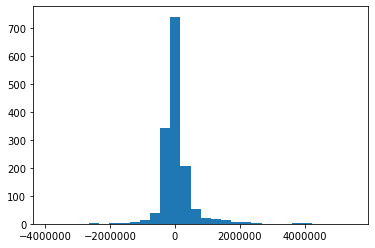

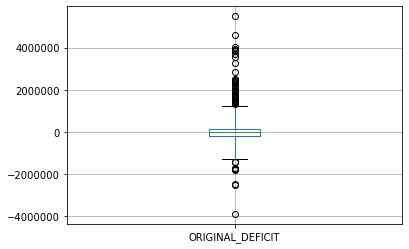

In [78]:
plt.hist(education_df['ORIGINAL_DEFICIT'],bins=30)
plt.show()

education_df[['ORIGINAL_DEFICIT']].boxplot(whis=3.5)

In [79]:
percentile = get_percentile(education_df, 3.5, 'ORIGINAL_DEFICIT')
education_df['ORIGINAL_DEFICIT'] = winsorize(education_df['ORIGINAL_DEFICIT'], percentile)

In [80]:
education_df

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,ORIGINAL_DEFICIT
0,1992_ALABAMA,ALABAMA,1992,5.084018e+05,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,261.925519,-25087.0
1,1992_ALASKA,ALASKA,1992,5.084018e+05,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,8789.0,6714.0,79117.0,30847.0,112335.0,211.790904,258.776900,207.088116,258.859712,-77103.0
2,1992_ARIZONA,ARIZONA,1992,5.084018e+05,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895,143501.0
3,1992_ARKANSAS,ARKANSAS,1992,5.084018e+05,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665,31063.0
4,1992_CALIFORNIA,CALIFORNIA,1992,5.084018e+05,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,265.519676,878807.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487,2017_VIRGINIA,VIRGINIA,2017,1.595024e+06,23766529.0,1680983.0,9277802.0,12807744.0,23352516.0,12247509.0,...,1103.0,1024.0,9403.0,5084.0,446508.0,248.041059,290.081407,227.598382,273.402640,-414013.0
1488,2017_WASHINGTON,WASHINGTON,2017,1.595024e+06,23766529.0,1680983.0,9277802.0,12807744.0,23352516.0,12247509.0,...,1103.0,1024.0,9403.0,5084.0,446508.0,241.701001,289.131257,223.123409,267.744778,-414013.0
1489,2017_WEST_VIRGINIA,WEST_VIRGINIA,2017,1.595024e+06,23766529.0,1680983.0,9277802.0,12807744.0,23352516.0,12247509.0,...,1103.0,1024.0,9403.0,5084.0,446508.0,236.057019,273.415854,217.316396,271.617023,-414013.0
1490,2017_WISCONSIN,WISCONSIN,2017,1.595024e+06,23766529.0,1680983.0,9277802.0,12807744.0,23352516.0,12247509.0,...,1103.0,1024.0,9403.0,5084.0,446508.0,240.389213,288.143144,219.612694,258.700304,-414013.0


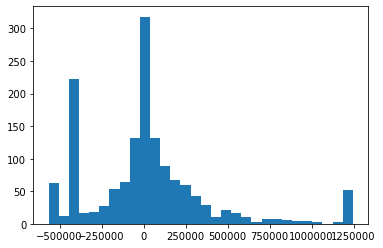

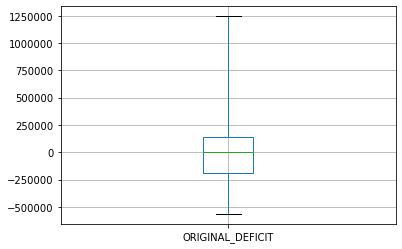

In [81]:
plt.hist(education_df['ORIGINAL_DEFICIT'],bins=30)
plt.show()

education_df[['ORIGINAL_DEFICIT']].boxplot(whis=3.5)

### 4. Now create another variable by subtracting the *TOTAL_EXPENDITURE* from *TOTAL_REVENUE*. This time, use the outlier eliminated versions of *TOTAL_EXPENDITURE* from *TOTAL_REVENUE*. In this newly created variable, can you find any outliers? If so, eliminate them.


In [84]:
education_df = education_df.assign(NOOUTS_DEFICIT=win_df['TOTAL_EXPENDITURE'] - win_df['TOTAL_REVENUE'])
education_df

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,ORIGINAL_DEFICIT,NOOUTS_DEFICIT
0,1992_ALABAMA,ALABAMA,1992,5.084018e+05,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,261.925519,-25087.0,-25087.0
1,1992_ALASKA,ALASKA,1992,5.084018e+05,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,6714.0,79117.0,30847.0,112335.0,211.790904,258.776900,207.088116,258.859712,-77103.0,-77103.0
2,1992_ARIZONA,ARIZONA,1992,5.084018e+05,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895,143501.0,143501.0
3,1992_ARKANSAS,ARKANSAS,1992,5.084018e+05,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665,31063.0,31063.0
4,1992_CALIFORNIA,CALIFORNIA,1992,5.084018e+05,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,265.519676,878807.0,878807.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487,2017_VIRGINIA,VIRGINIA,2017,1.595024e+06,23766529.0,1680983.0,9277802.0,12807744.0,23352516.0,12247509.0,...,1024.0,9403.0,5084.0,446508.0,248.041059,290.081407,227.598382,273.402640,-414013.0,-414013.0
1488,2017_WASHINGTON,WASHINGTON,2017,1.595024e+06,23766529.0,1680983.0,9277802.0,12807744.0,23352516.0,12247509.0,...,1024.0,9403.0,5084.0,446508.0,241.701001,289.131257,223.123409,267.744778,-414013.0,-414013.0
1489,2017_WEST_VIRGINIA,WEST_VIRGINIA,2017,1.595024e+06,23766529.0,1680983.0,9277802.0,12807744.0,23352516.0,12247509.0,...,1024.0,9403.0,5084.0,446508.0,236.057019,273.415854,217.316396,271.617023,-414013.0,-414013.0
1490,2017_WISCONSIN,WISCONSIN,2017,1.595024e+06,23766529.0,1680983.0,9277802.0,12807744.0,23352516.0,12247509.0,...,1024.0,9403.0,5084.0,446508.0,240.389213,288.143144,219.612694,258.700304,-414013.0,-414013.0


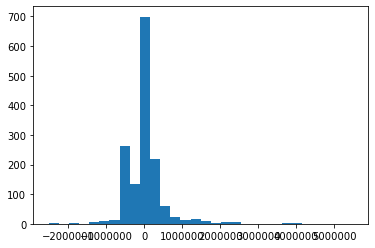

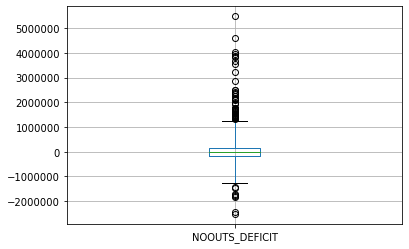

In [85]:
plt.hist(education_df['NOOUTS_DEFICIT'],bins=30)
plt.show()

education_df[['NOOUTS_DEFICIT']].boxplot(whis=3.5)

In [86]:
percentile = get_percentile(education_df, 3.5, 'NOOUTS_DEFICIT')
education_df['NOOUTS_DEFICIT'] = winsorize(education_df['NOOUTS_DEFICIT'], percentile)

In [87]:
education_df

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,ORIGINAL_DEFICIT,NOOUTS_DEFICIT
0,1992_ALABAMA,ALABAMA,1992,5.084018e+05,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,261.925519,-25087.0,-25087.0
1,1992_ALASKA,ALASKA,1992,5.084018e+05,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,6714.0,79117.0,30847.0,112335.0,211.790904,258.776900,207.088116,258.859712,-77103.0,-77103.0
2,1992_ARIZONA,ARIZONA,1992,5.084018e+05,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895,143501.0,143501.0
3,1992_ARKANSAS,ARKANSAS,1992,5.084018e+05,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665,31063.0,31063.0
4,1992_CALIFORNIA,CALIFORNIA,1992,5.084018e+05,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,265.519676,878807.0,878807.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487,2017_VIRGINIA,VIRGINIA,2017,1.595024e+06,23766529.0,1680983.0,9277802.0,12807744.0,23352516.0,12247509.0,...,1024.0,9403.0,5084.0,446508.0,248.041059,290.081407,227.598382,273.402640,-414013.0,-414013.0
1488,2017_WASHINGTON,WASHINGTON,2017,1.595024e+06,23766529.0,1680983.0,9277802.0,12807744.0,23352516.0,12247509.0,...,1024.0,9403.0,5084.0,446508.0,241.701001,289.131257,223.123409,267.744778,-414013.0,-414013.0
1489,2017_WEST_VIRGINIA,WEST_VIRGINIA,2017,1.595024e+06,23766529.0,1680983.0,9277802.0,12807744.0,23352516.0,12247509.0,...,1024.0,9403.0,5084.0,446508.0,236.057019,273.415854,217.316396,271.617023,-414013.0,-414013.0
1490,2017_WISCONSIN,WISCONSIN,2017,1.595024e+06,23766529.0,1680983.0,9277802.0,12807744.0,23352516.0,12247509.0,...,1024.0,9403.0,5084.0,446508.0,240.389213,288.143144,219.612694,258.700304,-414013.0,-414013.0


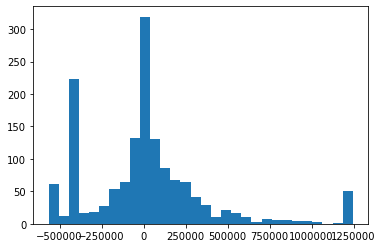

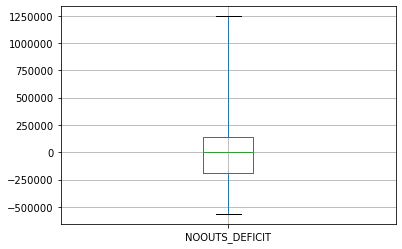

In [88]:
plt.hist(education_df['NOOUTS_DEFICIT'],bins=30)
plt.show()

education_df[['NOOUTS_DEFICIT']].boxplot(whis=3.5)

### 5. Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. Do you see any differences?

In [90]:
# I was actually rather shocked how similar the distributions are. In face, the function below shows there are only a handful of differing values
education_df.loc[education_df.ORIGINAL_DEFICIT != education_df.NOOUTS_DEFICIT]

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,ORIGINAL_DEFICIT,NOOUTS_DEFICIT
34,1992_NORTH_DAKOTA,NORTH_DAKOTA,1992,5.084018e+05,559481.0,51476.0,242693.0,265312.0,553732.0,315009.0,...,8014.00000,7.508200e+04,3.416500e+04,1.098870e+05,228.662815,283.213075,225.239083,261.888668,-5749.0,6183.0
42,1992_SOUTH_DAKOTA,SOUTH_DAKOTA,1992,3.289629e+05,551668.0,60671.0,147834.0,343163.0,593126.0,320561.0,...,8259.00000,8.582300e+04,3.632600e+04,1.228540e+05,211.722471,259.800296,207.973792,261.814966,41458.0,6183.0
87,1993_NORTH_DAKOTA,NORTH_DAKOTA,1993,1.187930e+05,580148.0,56254.0,243783.0,280111.0,588983.0,310940.0,...,8066.00000,7.476000e+04,3.500000e+04,1.103750e+05,222.249096,270.868255,218.846743,261.400394,8835.0,6183.0
94,1993_SOUTH_DAKOTA,SOUTH_DAKOTA,1993,1.070500e+05,465650.0,52787.0,120851.0,292012.0,481665.0,265549.0,...,8936.00000,8.948000e+04,3.997100e+04,1.300630e+05,221.640778,270.049290,218.391974,261.335905,16015.0,6183.0
103,1993_WYOMING,WYOMING,1993,1.003130e+05,615130.0,35437.0,308683.0,271010.0,614807.0,334071.0,...,6548.00000,6.421200e+04,2.949700e+04,7.308365e+05,220.858654,268.996335,217.807271,261.252990,-323.0,6183.0
139,1994_NORTH_DAKOTA,NORTH_DAKOTA,1994,1.187780e+05,603902.0,65506.0,247062.0,291334.0,621313.0,319014.0,...,8418.00000,7.410300e+04,3.586900e+04,1.106110e+05,217.730159,264.784514,215.468459,260.921332,17411.0,6183.0
146,1994_SOUTH_DAKOTA,SOUTH_DAKOTA,1994,1.084390e+05,507927.0,51846.0,126591.0,329490.0,525289.0,284638.0,...,8925.00000,8.906500e+04,4.135600e+04,1.316650e+05,217.121840,263.965549,215.013689,260.856843,17362.0,6183.0
784,2007_CALIFORNIA,CALIFORNIA,2007,6.288686e+06,72516936.0,7200298.0,42333637.0,22983001.0,73225422.0,34685013.0,...,468281.00000,3.801685e+06,2.011865e+06,5.881552e+06,230.034091,270.381784,208.522186,268.159428,708486.0,273780.0
836,2008_CALIFORNIA,CALIFORNIA,2008,6.258421e+06,74626928.0,7227456.0,43187637.0,24211835.0,76618865.0,36542347.0,...,476156.00000,3.770281e+06,2.013687e+06,5.854465e+06,242.446891,285.339231,224.484472,262.705654,1245529.0,273780.0
891,2009_CALIFORNIA,CALIFORNIA,2009,6.234155e+06,73958896.0,9745250.0,40084244.0,24129402.0,74766086.0,35617964.0,...,478503.00000,3.717166e+06,1.997064e+06,5.786013e+06,231.674927,270.448588,209.762405,254.895247,807190.0,273780.0


In [91]:
# One thing I notice is that it seems like where they differ is where the the handled ouliers are subtracted. In the first case, they use the actual outliers first, then sees if those differences are outliers. In the second case, they are resolved, then subtracted, yielding several repeat numbers.

### 6. If our variable of interest is the budget deficit variable, which method do you think is the appropriate in dealing with the outliers in this variable: the method in the 3rd question or the one in the 4th question?

In [ ]:
# I'd say the third question method more accurately represents the actual deficit values